# AutoClean y Predicción del tiempo de Intervención

- Grupo de Proyecto: Whitthe

## Index

1.[Carga de datos y Exploración](#id1)

2.[AutoClean](#id2)

3.[Importancia de carácteristicas (RandomForest)](#id3)

4.[Primero modelos](#id4)

5.[Anexo](#id5)

## 1. Carga datos y Exploración<a name="id1"></a>

Proceso fundamental para comprender y trabajar con los datos que se explorarán y analizarán, sentando las bases para análisis posteriores y la construcción de modelos.

In [80]:
import pandas as pd

data = pd.read_csv('nuevo_df.csv')

# Convertir todas las variables a tipo str
data = data.astype(str)

data = data.drop('Otro..especifique..1', axis=1)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
1,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos
2,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,60-90 minutos
3,Sí,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,10-20 minutos
4,No,No consumo,No,0,0,0,0,0,Cirugía Dentoalveolar,0,...,0,0,0,0,0,0,0,0,0,20-40 minutos


### Distribución

Comenzaremos con la dsitribución de nuesta variable predictora, a ver con que nos encontramos

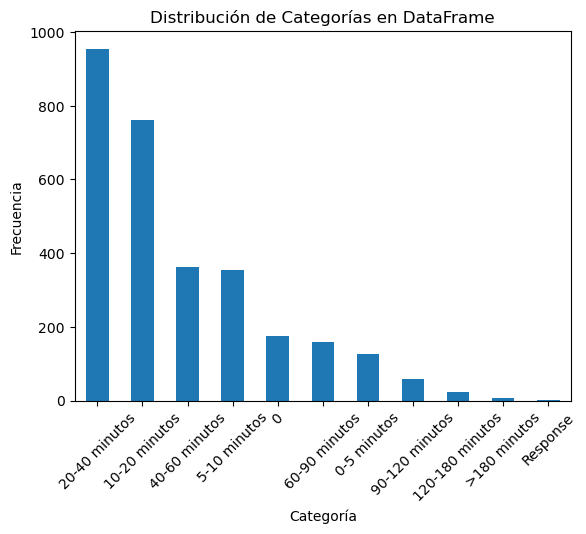

In [81]:
frecuencias = data['duracion_intervencion'].value_counts()

import matplotlib.pyplot as plt

# Creando el gráfico de barras
frecuencias.plot(kind='bar')

# Etiquetas y título
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de Categorías en DataFrame')
plt.xticks(rotation=45)  # Rota las etiquetas de las categorías para mejor visualización
plt.show()


#### Interpretación

En los datos de nuestra variable predictora, tenemos **2 valores** que no correponden a la naturalidad de los datos, esto son '0' y 'Responde'.

Vamos a proceder con la eliminación de las filas que contengan estos valores para no afectar negativamente al análisis y logicamente por el nulo sentido de analizar algo que es incorrecto.

Vamos a eliminar tambien la variabe de **"0-5 minutos"**, ya que es poco representativa y común, ya que tenemos otras que capturan mejor el tiempo que dura la intervención quirurgica.

In [82]:
import pandas as pd

print("Valores únicos antes de la limpieza:\n", data['duracion_intervencion'].unique(),'\n')

data = data[~data['duracion_intervencion'].isin(['0', 'Response'])]
data = data.loc[data['duracion_intervencion'] != '0-5 minutos']

print("Valores únicos después de la limpieza:\n", data['duracion_intervencion'].unique())

# Resetear el índice del DataFrame limpio
data.reset_index(drop=True, inplace=True)

Valores únicos antes de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '0-5 minutos' '0' '120-180 minutos' '90-120 minutos'
 '>180 minutos' 'Response'] 

Valores únicos después de la limpieza:
 ['10-20 minutos' '20-40 minutos' '60-90 minutos' '40-60 minutos'
 '5-10 minutos' '120-180 minutos' '90-120 minutos' '>180 minutos']


Una vez tenemos la variable predictora preparada y analizada, vamos a relaizar la partición de los datos en Train, Test y sus escalados.

Vamos con la limpieza de los datos.

___

## 2. Autoclean<a name="id2"></a>

La librería datacleaner es una herramienta de Python que automáticamente limpia y preprocesa el conjunto de datos para el análisis de datos y el modelado de machine learning. 

El módulo autoclean de datacleaner es probablemente el más conocido y utilizado.

En nuestro caso, el cambio realizado mas notable es:

- **Estandarización de Columnas Numéricas**: Puede escalar las características numéricas para que tengan un rango común o una distribución estándar, lo que es comúnmente necesario para modelos de machine learning que son sensibles a la escala de los datos.

Pero antes de nada, un paso vital.

### Busqueda de Na's

Paso esencial en la limpieza y preparación de datos. Los Na's pueden afectar negativamente el análisis y el modelado de datos, por lo que identificarlos y manejarlos de manera adecuada es fundamental. 

En esta etapa, se busca cualquier valor Na en el conjunto de datos y se decide cómo abordarlos, en nuestro caso será con la librería Autoclean.

In [83]:
data.isnull().sum()

Medicación.Actual                             0
Alcohol                                       0
Otras.Drogas                                  0
Tuberculosis                                  0
Nitratos.orgánicos                            0
                                             ..
Implante.6...Defecto.tipo.II..supraóseo..1    0
Implante.7...Posición                         0
Implante.7...Defecto.tipo.I..infraóseo.       0
Implante.7...Defecto.tipo.II..supraóseo.      0
duracion_intervencion                         0
Length: 100, dtype: int64

Como se puede observar, **NO** tenemos Na's e nuestro conjunto de datos.

### Limpieza

Vamos con la librería, observemos los cambios que produce

In [84]:
#!pip install datacleaner
from datacleaner import autoclean

data= autoclean(data)

# Los exportamos para usarlos mas abajo
data.to_csv("data_clean.csv", index=False)

data.head()

,Medicación.Actual,Alcohol,Otras.Drogas,Tuberculosis,Nitratos.orgánicos,Hormonas.pancreáticas,Antitusígenos,Fármacos.otológicos,Tipo.de.Intervención.Quirúrgica,Tipo.de.cirugía,...,Implante.5...Posición.2,Implante.5...Defecto.tipo.I..infraóseo..2,Implante.5...Defecto.tipo.II..supraóseo..2,Implante.6...Posición.1,Implante.6...Defecto.tipo.I..infraóseo..1,Implante.6...Defecto.tipo.II..supraóseo..1,Implante.7...Posición,Implante.7...Defecto.tipo.I..infraóseo.,Implante.7...Defecto.tipo.II..supraóseo.,duracion_intervencion
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Como bien podemos observar, nuestras columnas, que son de naturaleza categórica, han sido reemplazadas por numeros, que nos indican las distintas categorias que tienen nuestreas variables, esto facilitará la labor de análisis muchisimo.

El siguiente paso es de gran importancia.

___

## 3. Importancia de carácteristicas (RandomForest)<a name="id3"></a>

La importancia de las características (o importancia de los atributos) en el contexto de un modelo de Random Forest es una medida de la contribución de cada característica en la predicción de la variable objetivo. 

Trata de **cuantificar cuánto ayuda** cada característica para mejorar la precisión del modelo.

En un modelo de Random Forest, que es un ensamble de árboles de decisión, cada árbol se construye como resultado de un proceso estocástico que implica seleccionar subconjuntos de características y subconjuntos de datos. Después de entrenar, cada árbol de decisión dentro del bosque tiene una idea de cuáles características ayudaron más a hacer predicciones precisas.

Existe un paso necesario antes de ajustar el modelo para visualizar la importancia de las características.

### Partición de los datos 

Vamos a dividir nuestro cojunto de datos en Train, Test y sus escalados.

In [85]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ya estamos preparados para seguir con la visualización de las características más importantes.

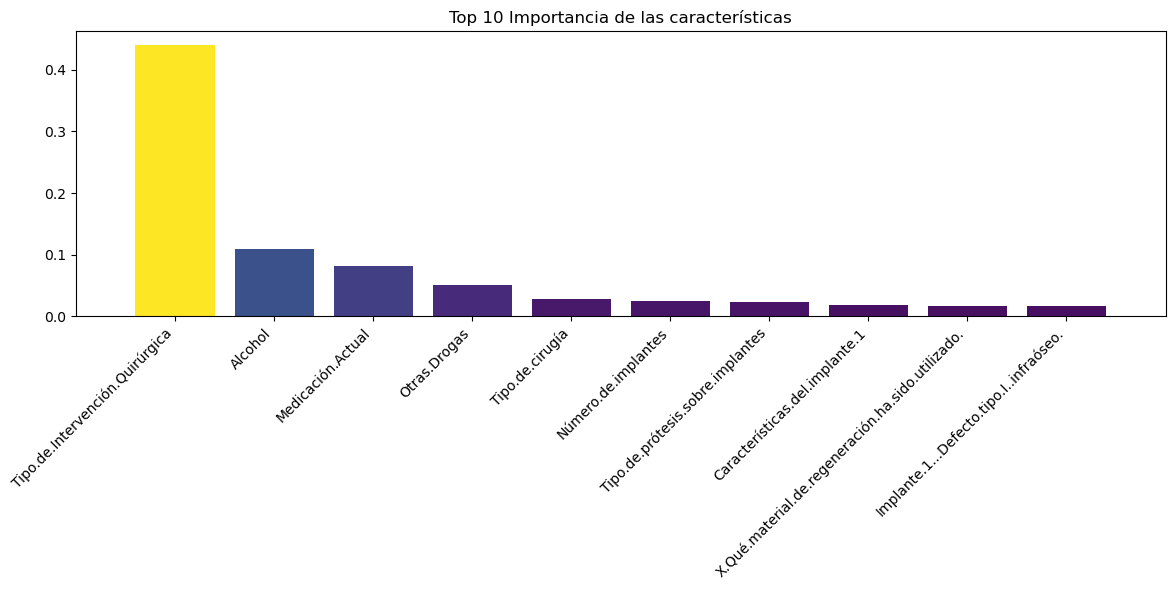

In [86]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Modelo RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Obtener las importancias de las características y sus índices
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_k = 10
sorted_importances = importances[indices[:top_k]]
sorted_indices = indices[:top_k]

# Nombres de las 10 características más importantes
feature_names = data.columns.tolist()

feature_names = np.array(feature_names)
top_k_feature_names = feature_names[sorted_indices]

colors = plt.cm.viridis(sorted_importances / sorted_importances.max())

# Dibujar la importancia de las 10 características más importantes
plt.figure(figsize=(12, 6))
plt.title("Top 10 Importancia de las características")
plt.bar(range(top_k), sorted_importances, color=colors, align="center")
plt.xticks(range(top_k), top_k_feature_names, rotation=45, ha='right')
plt.xlim([-1, top_k])
plt.tight_layout()
plt.show()

# Reducir el DataFrame completo a las 10 características más importantes
data_reduced = data[top_k_feature_names.tolist() + ['duracion_intervencion']]  # Incluye la columna objetivo nuevamente si es necesario

In [87]:
data = data_reduced

from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop('duracion_intervencion', axis=1)  # Aquí 'target_variable_column_name' es el nombre de la columna que contiene la variable objetivo
y = data['duracion_intervencion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Alarma 2!!!**

La variable **"Otro..especifique..1"**, tiene una distribución que puede molestar en el análisis, haciendo que las prediciones no sean correctas y se clasifiquen mas las duraciones de las cirugías.

El problema fué a la hora de establecer la forma de rellenar la columna, ya que no se siguió ningún parámetro de idoneidad para todos los que fuerán a rellenarla. Es por ello que tenemos muchas variables con el mismo nombre, pero de muchisimas formas distintas y arreglarlo es tedioso. 

Es por ellos que decidimos eliminarla al principio y sacrificar esta información para la mejora del modelo.

___

## 4. Primero modelos<a name="id4"></a>

En este punto, vamos a comenzar con algunos modelos de classificación, para poder predecir que intervalo de duración nos va a llevar realizar la intervención quirurgica.

El procedimiento que vamos a realizar es el de automatizar el proceso de probar varios modelos a la vez y comparar su rendimiento. Esta técnica a menudo se conoce como **evaluación de modelo o selección de modelo**. 

En Python, podemos hacer esto utilizando la librería scikit-learn y su módulo model_selection. Una manera de hacer esto es utilizando Pipeline para el preprocesamiento y la evaluación de diferentes modelos, junto con **GridSearchCV** o **RandomizedSearchCV** para la optimización de hiperparámetros.

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


# Definir un diccionario de modelos a probar
modelos = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

# Lista para almacenar los resultados y los nombres de los modelos
resultados = []
nombres = []

# Bucle para evaluar cada modelo
for nombre, modelo in modelos.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('modelo', modelo)])
    cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)
    resultados.append(cv_scores)
    nombres.append(nombre)
    print(f'{nombre}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')


LogisticRegression: 0.3663 (+/- 0.0072)
SGDClassifier: 0.2767 (+/- 0.0808)
SVC: 0.3644 (+/- 0.0070)
KNeighborsClassifier: 0.2273 (+/- 0.0367)
DecisionTreeClassifier: 0.3630 (+/- 0.0096)
RandomForestClassifier: 0.3630 (+/- 0.0094)
GradientBoostingClassifier: 0.3626 (+/- 0.0074)
AdaBoostClassifier: 0.3626 (+/- 0.0054)
GaussianNB: 0.1419 (+/- 0.0067)


/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:523: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:523: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:523: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:523: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

MLPClassifier: 0.3644 (+/- 0.0102)
XGBClassifier: 0.3635 (+/- 0.0109)


### Hiperparámetros

La optimización de hiperparámetros es crucial porque los parámetros predeterminados de la mayoría de los algoritmos de machine learning raramente son los óptimos para un conjunto de datos específico. Ajustar estos hiperparámetros puede significativamente mejorar el rendimiento del modelo.

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir el modelo y los hiperparámetros a ajustar
model = SVC()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', model)
])

param_grid = {
    'svc__C': [0.1, 1, 10],  # Reducido el rango de valores
    'svc__gamma': ['scale', 0.1, 1],  # Reducido el rango de valores
    'svc__kernel': ['rbf', 'poly']  # Reducido el número de kernels
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Mejores parámetros y mejor puntuación
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación obtenida: ", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros:  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
Mejor puntuación obtenida:  0.3649053438773065


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Creando y entrenando el modelo
model = SVC(C=1, gamma='scale', kernel='rbf')
model.fit(X_train, Y_train)

# Predicciones
Y_pred = model.predict(X_test)

# Matriz de confusión
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print("Final Accuracy:", accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)



Final Accuracy: 0.3824626865671642
Final Confusion Matrix:
 [[ 11   0 150   1   0   0   0   0]
 [  0   0   1   3   0   0   0   0]
 [  5   0 189   5   0   0   0   0]
 [  0   0  50   5   0   1   0   0]
 [  5   0  71   0   0   0   0   0]
 [  0   0  18   9   0   0   0   0]
 [  0   1   6   3   0   0   0   0]
 [  0   1   0   1   0   0   0   0]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.07      0.12       162
           1       0.00      0.00      0.00         4
           2       0.39      0.95      0.55       199
           3       0.19      0.09      0.12        56
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2

    accuracy                           0.38       536
   macro avg       0.14      0.14      0.10       536
weighted avg       0.32      0.38

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

#### Interpretación

- Distribución Desigual (Imbalanced Dataset): Claramente, el conjunto de datos está desbalanceado. Las clases como la 1 y la 7 tienen muy pocas muestras comparadas con clases como la 0, 2, y 3. Este desbalance severo puede hacer que el modelo esté sesgado hacia las clases más frecuentes. La clase 2 domina las predicciones, con una alta tasa de recall (0.95), lo que significa que el modelo es muy bueno detectando esta clase pero a costa de ignorar otras.

- Baja Precisión y Recall en la Mayoría de las Clases: Las clases 1, 4, 5, 6, y 7 tienen precisiones y recalls de 0, indicando que el modelo no pudo identificar correctamente ninguna muestra positiva de estas clases. Esto es indicativo de un modelo que no ha aprendido a diferenciar bien entre las clases. Las métricas F1-score son extremadamente bajas para la mayoría de las clases excepto para la clase 2, indicando un mal rendimiento general del modelo más allá de la clase dominante.

- Overfitting a la Clase Dominante: El modelo parece estar sobreajustado a la clase 2, posiblemente debido al desbalance de clases. Está principalmente prediciendo la clase 2 para casi todas las entradas, como se ve en la alta cantidad de falsos positivos para esta clase.

La solución parece ser el **Resample**

### Resample

In [91]:
from sklearn.utils import resample  # Importando resample correctamente

df = data
# Determinar el número máximo de muestras por clase
max_samples = df['duracion_intervencion'].value_counts().max()

# Lista de clases (asegúrate de incluir todas las clases que existen, de 0 a 9)
classes = df['duracion_intervencion'].unique()

balanced_dfs = []
for cls in classes:
    # Extraer el subset de cada clase
    class_subset = df[df['duracion_intervencion'] == cls]
    
    # Resamplear el subset a 'max_samples'
    resampled_subset = resample(class_subset,
                                replace=True,
                                n_samples=max_samples,
                                random_state=42)
    
    balanced_dfs.append(resampled_subset)

# Combinar en un nuevo DataFrame
balanced_df = pd.concat(balanced_dfs)

# Mezclar las filas para asegurar aleatoriedad
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar los nuevos conteos de clases
print("New class counts:")
print(balanced_df['duracion_intervencion'].value_counts())


New class counts:
duracion_intervencion
0    955
6    955
5    955
7    955
1    955
2    955
3    955
4    955
Name: count, dtype: int64


Volver a aplicar el modelo

### SVM

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

# Preparando los datos
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

# Escalando los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creando y entrenando el modelo SVC
model = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)  # Corrección aquí: usar 'y_train' en vez de 'Y_train'

# Realizando predicciones con el conjunto de prueba escalado
y_pred = model.predict(X_test_scaled)  # Corrección aquí: usar 'X_test_scaled' en vez de 'X_test'

# Calculando la exactitud y la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimiendo los resultados
print("Final Accuracy:", accuracy)
print("Final Confusion Matrix:\n", conf_matrix)
print("Final Classification Report:\n", class_report)


Final Accuracy: 0.3730366492146597
Final Confusion Matrix:
 [[122   0  42   0  23   4   0   0]
 [ 13 107   7   0  26   0  38   0]
 [107   0  47   0  33   0   4   0]
 [111   6  34   0  29   1  10   0]
 [115   0  39   0  37   0   0   0]
 [ 81  19  21   0  24  19  27   0]
 [ 43  51  15   0   9   3  70   0]
 [  0   0   0   0   0   0  23 168]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.64      0.31       191
           1       0.58      0.56      0.57       191
           2       0.23      0.25      0.24       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.41      0.37      0.39       191
           7       1.00      0.88      0.94       191

    accuracy                           0.37      1528
   macro avg       0.42      0.37      0.35      1528
weighted avg       0.42      0.37

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**ROC**

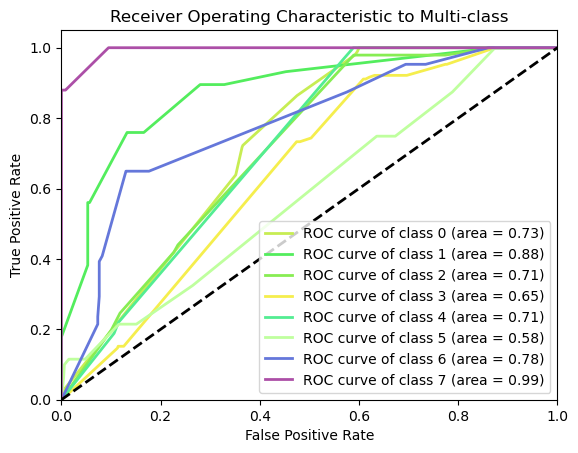

In [93]:
# Paso 1. Obtener probabilidades de las clases
y_prob = model.predict_proba(X_test_scaled)

# Paso 2. Cálculo de ROC y AUC para cada clase
n_classes = y_prob.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Paso 3. Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()

**Interpretación de las Curvas y AUC:**

Las **curvas Roc** más cercanas a la esquina superior izquierda indican un mejor rendimiento. Si alguna de las curvas de clase está más cerca de la línea punteada, eso sugiere que el modelo tiene dificultades para distinguir esa clase particular del resto.

Un **AUC** más cercano a 1 indica que el modelo tiene un buen rendimiento en la clasificación de esa clase en particular. Si el AUC es cercano a 0.5, el modelo no está haciendo un trabajo mucho mejor que el azar en la clasificación de esa clase.

### XGBClassifier

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'min_child_weight': [1, 2, 3]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
print("Improved XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Improved XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Improved XGBoost Accuracy: 0.38023560209424084
Improved XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

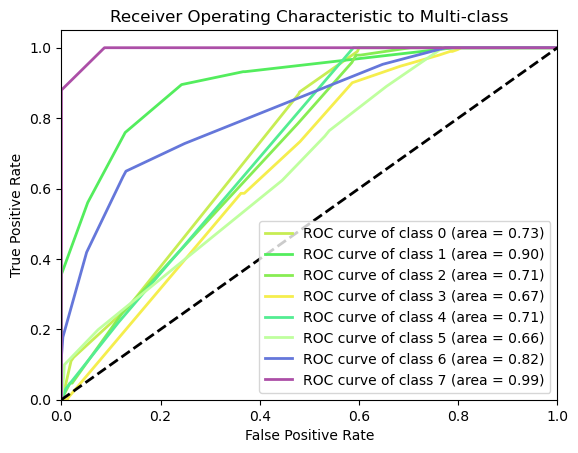

In [95]:
from sklearn.metrics import roc_curve, auc

# Paso 1. Probabilidades
y_prob = best_xgb.predict_proba(X_test_scaled)

# Paso 2. Calculo de ROC y AUC para cada clase
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Número de clases
n_classes = y_prob.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


In [96]:
import joblib

# Guardar el modelo
joblib.dump(best_xgb, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

___

# Anexo<a name="id5"></a>

### Ajuste de Hiperparámetros

Para el Gradient Boosting

In [32]:
from sklearn.model_selection import GridSearchCV

# Definición de parámetros para Grid Search
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'min_samples_leaf': [1, 2]
}

# Configuración del modelo para Grid Search
gbm_grid = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbm_grid, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Resultados de Grid Search
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Best Estimator:", best_estimator)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Score: 0.36304675716440427
Best Estimator: GradientBoostingClassifier(max_depth=5, random_state=42)


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Configuración e inicialización del modelo con los mejores parámetros
gbm_final = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, min_samples_leaf=2, random_state=42)
gbm_final.fit(X_train, Y_train)

# Realizando predicciones con el conjunto de prueba
Y_pred_final = gbm_final.predict(X_test)

# Evaluación de las métricas de desempeño
accuracy_final = accuracy_score(Y_test, Y_pred_final)
conf_matrix_final = confusion_matrix(Y_test, Y_pred_final)
class_report_final = classification_report(Y_test, Y_pred_final)

print("Final Accuracy:", accuracy_final)
print("Final Confusion Matrix:\n", conf_matrix_final)
print("Final Classification Report:\n", class_report_final)


Final Accuracy: 0.3824626865671642
Final Confusion Matrix:
 [[ 15   0 145   0   1   1   0   0]
 [  0   0   1   3   0   0   0   0]
 [  9   0 185   1   0   4   0   0]
 [  1   0  49   1   0   5   0   0]
 [  5   0  71   0   0   0   0   0]
 [  1   0  17   6   0   3   0   0]
 [  0   1   6   1   0   1   1   0]
 [  0   1   0   1   0   0   0   0]]
Final Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.09      0.16       162
           1       0.00      0.00      0.00         4
           2       0.39      0.93      0.55       199
           3       0.08      0.02      0.03        56
           4       0.00      0.00      0.00        76
           5       0.21      0.11      0.15        27
           6       1.00      0.10      0.18        10
           7       0.00      0.00      0.00         2

    accuracy                           0.38       536
   macro avg       0.27      0.16      0.13       536
weighted avg       0.33      0.38

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

**Clase 4** (Mejor rendimiento):

    - Precision: 0.32

    - Recall: 0.94

    - F1-Score: 0.48

Esta clase tiene un recall muy alto, lo que indica que el modelo es capaz de identificar correctamente la mayoría de los casos positivos. Sin embargo, la precisión es baja, lo que significa que muchas predicciones hechas como clase 4 son incorrectas (falsos positivos).

Clases con Rendimiento Pobre:

- **Clase 1, 3, 9**: Estas clases tienen recall de 0.00, lo que indica que el modelo no pudo identificar correctamente ningún caso positivo real de estas clases. Similarmente, sus precisiones son bajas o cero, reflejando una ineficacia total en la predicción de estas clases.


- **Clase 2, 5, 6**: También muestran desempeños muy pobres con F1-scores extremadamente bajos.

Clases con Desempeño Moderado:

- **Clase 0 y 7** tienen mejores F1-scores de 0.72 y 0.27, respectivamente, mostrando un balance más adecuado entre precisión y recall en comparación con otras clases.

__________

## Mejora del modelo

### Reesample

In [34]:
data['duracion_intervencion'].unique()

array([0, 2, 5, 3, 4, 1, 6, 7])

In [35]:
from sklearn.utils import resample  # Importando resample correctamente

df = data
# Determinar el número máximo de muestras por clase
max_samples = df['duracion_intervencion'].value_counts().max()

# Lista de clases (asegúrate de incluir todas las clases que existen, de 0 a 9)
classes = df['duracion_intervencion'].unique()

balanced_dfs = []
for cls in classes:
    # Extraer el subset de cada clase
    class_subset = df[df['duracion_intervencion'] == cls]
    
    # Resamplear el subset a 'max_samples'
    resampled_subset = resample(class_subset,
                                replace=True,
                                n_samples=max_samples,
                                random_state=42)
    
    balanced_dfs.append(resampled_subset)

# Combinar en un nuevo DataFrame
balanced_df = pd.concat(balanced_dfs)

# Mezclar las filas para asegurar aleatoriedad
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar los nuevos conteos de clases
print("New class counts:")
print(balanced_df['duracion_intervencion'].value_counts())


New class counts:
duracion_intervencion
0    955
6    955
5    955
7    955
1    955
2    955
3    955
4    955
Name: count, dtype: int64


In [36]:
# Verificar si hay valores nulos
print("Verificación de valores nulos en el dataset:")
print(balanced_df.isnull().sum())

Verificación de valores nulos en el dataset:
Medicación.Actual                             0
Alcohol                                       0
Otras.Drogas                                  0
Tuberculosis                                  0
Nitratos.orgánicos                            0
                                             ..
Implante.6...Defecto.tipo.II..supraóseo..1    0
Implante.7...Posición                         0
Implante.7...Defecto.tipo.I..infraóseo.       0
Implante.7...Defecto.tipo.II..supraóseo.      0
duracion_intervencion                         0
Length: 100, dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

# Supongamos que todas las otras columnas son características
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

In [38]:

from sklearn.model_selection import train_test_split

# Supongamos que todas las otras columnas son características
features = balanced_df.drop('duracion_intervencion', axis=1)
target = balanced_df['duracion_intervencion']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.38023560209424084
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

**Clases con Mayor Recall**

- Clase 0: Alto recall (0.58) pero baja precisión (0.15), indicando que el modelo identifica correctamente muchos casos de esta clase, pero también incluye muchos falsos positivos.

- Clase 8: Muy alto recall (0.84) y perfecta precisión (1.00), lo que la hace la clase mejor predicha, mostrando tanto alta especificidad como alta sensibilidad.

**Clases con Desempeño Pobre**

- Clase 4: A pesar de tener una precisión perfecta (1.00), tiene un recall extremadamente bajo (0.02), lo que indica que el modelo es muy conservador al predecir esta clase y casi siempre acierta cuando lo hace, pero se pierde casi todos los verdaderos positivos.

- Clase 1 y Clase 6: Tienen precisiones moderadas a altas pero recalls muy bajos, sugiriendo que el modelo es demasiado selectivo o conservador con estas clases.

**Desbalance Entre Precision y Recall**

Varias clases muestran un desbalance significativo entre precision y recall, lo cual es típico en conjuntos de datos con clases desbalanceadas o cuando el modelo está ajustado para maximizar una métrica a expensas de la otra.s.

### Ajuste Hiperparámetros

In [40]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo y los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Re-evaluating the model
y_pred = best_model.predict(X_test_scaled)
new_accuracy = accuracy_score(y_test, y_pred)
new_report = classification_report(y_test, y_pred)

print("New Accuracy:", new_accuracy)
print("New Classification Report:\n", new_report)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; to

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_feature

/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in 

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
New Accuracy: 0.38023560209424084
New Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.72      0.34       191
           1       0.60      0.56      0.58       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Interpretación**

- Clase 8 y Clase 0: La Clase 8 tiene un desempeño excepcional con una precisión y un recall muy altos, lo que resulta en un F1-score de 0.91. Esto indica que el modelo es capaz de identificar y clasificar correctamente la mayoría de los casos de esta clase.

- La Clase 0, por otro lado, aunque tiene un recall alto (0.58), su precisión es muy baja (0.15), resultando en un F1-score bajo (0.24). Esto sugiere que, aunque el modelo identifica correctamente muchos casos positivos de esta clase, también tiene muchos falsos positivos.

**Clases con Bajo Desempeño:**

- Clase 4, Clase 1, y Clase 6 tienen recalls bajos a moderados combinados con precisiones variables, lo que lleva a F1-scores bajos. Específicamente, la Clase 4, a pesar de tener una precisión perfecta (1.00), tiene un recall casi nulo (0.02), lo que indica que el modelo casi nunca predice esta clase y cuando lo hace, es correcto, pero omite la mayoría de los casos positivos reales.

- Clase 2 muestra una mejor congruencia entre precisión (0.65) y recall (0.61), resultando en el F1-score más alto (0.63) después de la Clase 8.

___

## Probemos mas modelos

### XGBoost

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.5)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:\n", report_xgb)


XGBoost Accuracy: 0.38154450261780104
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.73      0.34       191
           1       1.00      0.36      0.53       191
           2       0.22      0.20      0.21       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.67      0.06      0.11       191
           6       0.42      0.63      0.51       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.47      0.38      0.35      1528
weighted avg       0.47      0.38      0.35      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

**Clases con Mejor Desempeño:**

- Clase 8: Alta precisión (0.99) y alto recall (0.84), lo que resulta en un F1-score excelente (0.91). Esto indica que el modelo es muy eficaz para esta clase.

- Clase 2: Buena precisión (0.93) con un recall moderado (0.43), resultando en un F1-score relativamente bueno (0.59).

**Clases con Rendimiento Pobre:**

- Clase 4: Muy baja precisión (0.33) y extremadamente bajo recall (0.01), resultando en un F1-score casi nulo (0.01). Similar a observaciones anteriores, esto sugiere que el modelo es incapaz de identificar correctamente los casos positivos.

- Clase 1, Clase 6: Ambas clases muestran bajas precisiones y recalls, indicando dificultades en la clasificación correcta de estas categorías.

**Desbalance en Precision y Recall:**

Varias clases muestran un desbalance significativo entre precisión y recall. Por ejemplo, la Clase 0 tiene un recall relativamente alto (0.57) comparado con su precisión (0.16), sugiriendo que el modelo es capaz de identificar esta clase pero con muchos falsos positivos

### Hiperparámetros

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'min_child_weight': [1, 2, 3]
}

xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)
print("Improved XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Improved XGBoost Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; tota

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_feat

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sq

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_feature

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_feat

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, ma

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_featur

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_featu

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.9}
Improved XGBoost Accuracy: 0.3763089005235602
Improved XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.64      0.31       191
           1       0.60      0.56      0.58       191
           2       0.23      0.25      0.24       191
           3       0.00      0.00      0.00       191
           4       0.20      0.19      0.20       191
           5       0.70      0.10      0.17       191
           6       0.42      0.39      0.41       191
           7       1.00      0.88      0.94       191

    accuracy                           0.38      1528
   macro avg       0.42      0.38      0.36      1528
weighted avg       0.42      0.38      0.36      1528



/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manuelrocamoravalenti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1513: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

No llegamos a ningún sitio así, hay que coger otros caminos

Aún así, siendo este el mejor de los resultados, vamos a analizar su **curva ROC**

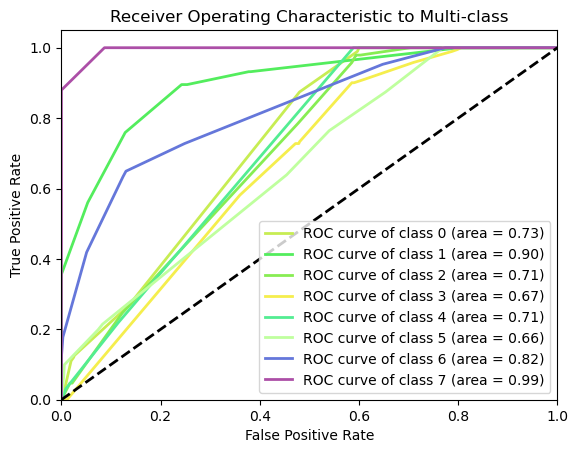

In [44]:
from sklearn.metrics import roc_curve, auc

# Paso 1. Probabilidades
y_prob = best_xgb.predict_proba(X_test_scaled)

# Paso 2. Calculo de ROC y AUC para cada clase
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Número de clases
n_classes = y_prob.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Gráfica de la Curva ROC para cada clase
colors = ['#C7ED53', '#53ED5D', '#87ED53', '#F5EE4D', '#53ED92', '#BFFF9E', '#6577DA','#AC4FA7','#76B1B8']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()


**Interpretación de las Curvas y AUC:**

Las **curvas Roc** más cercanas a la esquina superior izquierda indican un mejor rendimiento. Si alguna de las curvas de clase está más cerca de la línea punteada, eso sugiere que el modelo tiene dificultades para distinguir esa clase particular del resto.

Un **AUC** más cercano a 1 indica que el modelo tiene un buen rendimiento en la clasificación de esa clase en particular. Si el AUC es cercano a 0.5, el modelo no está haciendo un trabajo mucho mejor que el azar en la clasificación de esa clase.

## Tpot

TPOT (Tree-based Pipeline Optimization Tool) es una herramienta de AutoML que utiliza programación genética para optimizar automáticamente los pipelines de aprendizaje automático. Es una excelente opción cuando buscas explorar diferentes modelos y preprocesamientos de datos sin la necesidad de programar cada uno de ellos manualmente. TPOT puede descubrir combinaciones de pasos de procesamiento y modelos que ni siquiera habías considerado, y a menudo puede identificar un pipeline que funciona mejor que cualquier enfoque que hayas probado manualmente.

- Ventajas de Usar TPOT:
    - Automatización: TPOT automatiza gran parte del proceso de prueba y error en la selección y optimización de modelos y pasos de preprocesamiento.
    - Optimización: Utiliza algoritmos genéticos para optimizar eficientemente el pipeline, lo que puede ser más efectivo que la búsqueda en cuadrícula o la búsqueda aleatoria.
    - Completo: Considera no solo modelos de ML, sino también una serie de transformaciones de preprocesamiento de datos.
    - Fácil de Usar: Tiene una interfaz similar a Scikit-Learn, lo que facilita su integración en los flujos de trabajo existentes de Scikit-Learn.

- Consideraciones:
    - Tiempo de Ejecución: TPOT puede llevar mucho tiempo en ejecutarse, especialmente para conjuntos de datos grandes o complejos, ya que evalúa muchas combinaciones diferentes.
    - Recursos Computacionales: Requiere recursos computacionales significativos, que pueden ser un problema si las capacidades son limitadas.
    - Complejidad del Modelo Final: Los pipelines generados pueden ser complicados y difíciles de interpretar.
    - Overfitting: Al igual que con cualquier proceso de búsqueda de modelos, existe el riesgo de overfitting al conjunto de datos de entrenamiento, especialmente si no se gestiona cuidadosamente la validación cruzada.

In [27]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


# Instanciar TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
tpot.export('tpot_digits_pipeline.py')  # Exporta el código Python para el pipeline óptimo


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.37483516292340074

Generation 2 - Current best internal CV score: 0.37483516292340074

Generation 3 - Current best internal CV score: 0.374835296746885

Generation 4 - Current best internal CV score: 0.3767990225532718

Generation 5 - Current best internal CV score: 0.3767990225532718

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9)
0.38023560209424084


In [31]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Average CV score on the training set was: 0.3767990225532718
exported_pipeline = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 5, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 6, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 5, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponemos que `data` ya está definido y correctamente preparado
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Configuración del modelo exportado desde TPOT
exported_pipeline = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, 
    min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9
)

# Aseguramos que el parámetro random_state está fijado para reproducibilidad
exported_pipeline.random_state = 42

# Entrenar el modelo
exported_pipeline.fit(training_features, training_target)

# Predecir las etiquetas de los datos de prueba
predictions = exported_pipeline.predict(testing_features)

# Calcular el accuracy
accuracy = accuracy_score(testing_target, predictions)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.38


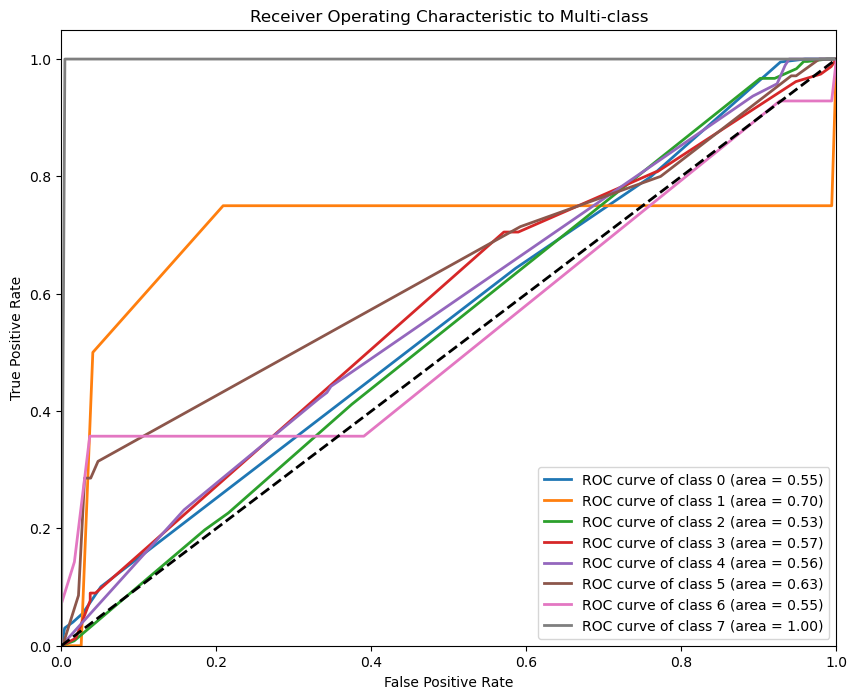

In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Suponemos que `data` ya está definido y correctamente preparado
tpot_data = data
features = tpot_data.drop('duracion_intervencion', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['duracion_intervencion'], random_state=42)

# Configuración del modelo exportado desde TPOT
exported_pipeline = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=5, max_features=0.8500000000000001, 
    min_samples_leaf=8, min_samples_split=3, n_estimators=100, subsample=0.9, random_state=42
)

# Entrenar el modelo
exported_pipeline.fit(training_features, training_target)

# Predecir las probabilidades para cada clase
probabilities = exported_pipeline.predict_proba(testing_features)

# Número de clases
n_classes = probabilities.shape[1]

# Diccionario para almacenar FPR, TPR, y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcula la curva ROC y AUC para cada clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testing_target == i, probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colores para las distintas clases
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Gráfica de la Curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()
